<a href="https://colab.research.google.com/github/Regina-Arthur/Coding-Practice-Projects/blob/main/Stanford_Computer_Vision/Notes/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Lecture 5 and 6:** ***CNN Architecture***

**What is a convolution?**

A convolution is a mathematical operation that describes how the shape of one function modifies another by "sliding" one function over the other, multiplying them at each point of overlap, and summing the results to create a new function.

**What is a Convolutional Neural Network?**

A convolutional neural network is a type of neural network that performs convolutions on the input image while its spatial information is preserved, using matrices with an equal number of channels in order to extract useful hierarchical features, before the input is flattened and passed to the fully connected layers.

**How convolution neural network are built in code**

**Pytorch Implementation**

    import torch # imports the PyTorch library

    import torch.nn as nn

    """Imports the nn package as nn which contains the functions and classes  
    needed to build convolutional neural networks. It creates learnable
    parameters for these functions and classes. However, we need to
    initialize them in the init of the model class before using them in the
    feed forward."""

    import torch.nn.functional as F
    """This contains similar functions except learnable parameters will not
    be created for them. They must be entered manually for some functions, but
    some functions do need the learnable parameters either way."""

    nn.Module is the parent class on which all models are built.

    One way to build a model is to build a class that inherits from the
    parent model.
    Within the child class, there are two main methods: initialization and forward method.

    The initialization method  
    We initialize the parent class’s initializations and the child class’s initializations.

    The forward method  
    This is where we define how the input passes through the model architecture.
    """

    class CNNWithNorm(nn.Module):
        def __init__(self, num_classes=10):
            super().__init__()
            
            # First conv block
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,
            stride=2, padding=1)
            # This is an nn function for building a convolutional layer.
            # in_channels (this takes in the number of input channels),
            # out_channels (this takes in the number of expected output channels),
            # kernel_size (the dimensions of the kernel we will be applying to
            our image data),
            # stride (this sets the number of strides that will be used for that
            particular convolution),
            # padding (this sets the layers of padding around the input image)
            
            self.bn1 = nn.BatchNorm2d(32)   # batch normalization for conv
            output, we pass it our channel size for it to perform normalization
            self.relu = nn.ReLU() # Activation function initialization using nn
            package
            
            # Second conv block
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.bn2   = nn.BatchNorm2d(64)
            
            # Third conv block
            self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
            self.bn3   = nn.BatchNorm2d(128)
            
            # Fully connected layers
            self.fc1 = nn.Linear(128 * 4 * 4, 256)  # assuming input images are
            32x32, nn function for performing a linear layer
            self.bn_fc1 = nn.BatchNorm1d(256)       # normalization in the FC
            layer
            
            self.fc2 = nn.Linear(256, num_classes)

            self.pool = nn.MaxPool2d(2, 2)  # downsampling, nn function for
            performing the pooling layer, it takes in the kernel dimension and
            number of strides.
        
        def forward(self, x):
            # Convolutional blocks with BN + ReLU
            x = self.pool(F.relu(self.bn1(self.conv1(x))))  # [batch, 32, 16, 16]
            (F.relu is the ReLU activation function from the torch.nn.functional
            package, so no parameters are stored.)
            x = self.pool(self.relu(self.bn2(self.conv2(x))))  # [batch, 64, 8,
            8] (ReLU activation function from the torch.nn package, so parameters
            are stored.)
            x = self.pool(F.relu(self.bn3(self.conv3(x))))  # [batch, 128, 4, 4]
            
            # Flatten for fully connected layers
            x = x.view(x.size(0), -1)  # This resizes the input images. It
            maintains the first layer which contains the batch size. Because of
            the -1, all the other layers are combined into a single layer, which
            means for every image in a batch there is a vector containing (C x W
            x H) number of values.
            
            # Fully connected block
            x = F.relu(self.bn_fc1(self.fc1(x)))
            x = self.fc2(x)  # logits (no activation, softmax applied later)
            
            return x



####**What will be covered**
**How to build CNNs**
* Layers in CNNs
* Activation Functions
* CNN Architectures
* Weight Initialization

**How to train CNNs**
* Data Preprocessing
* Data Augmentation
* Transfer Learning
* Hyperparameter Selection






**Layers(Components) in CNNs**
* Convolutional Layer
* Normalization Layer (There are alternatives)
* Activation Function/Layer
* Pooling Layer
* Dropout Layer (depends on you)
* Fully Connected Layer



**Convolutional Layer**
* What is a convolutional layer?
* How do I do it in code?

**What is a convolutional layer?**

This is a layer in which we perform a single convolution between our data elements and a kernel or filter. We can set the stride, pooling, and some other features as well.

Depending on the programming library and package we use, you will be able to manipulate this layer in various ways.

In PyTorch, when building a full architecture, we are provided with a parent class to inherit from. The mathematical operations and processes are taken care of in the parent class. In order to have access to the parent class, PyTorch offers a variety of means.

The means we will use is to create our own child class and inherit directly from the parent class called nn.Module.

When using this strategy, everything concerning the architecture and how the data will pass through said architecture must be set or used in the class (that is, if it is not set directly in the class).

If we are using functions from the nn package directly, we will have to initialize the various convolutional neural network layers and set our various hyperparameters in the constructor of our child class, after we initialize the parent class’s constructor.

When it comes to the layering of our architecture while passing the data through it, PyTorch has a special reserved method name (forward) for doing this, and so when creating our pass method we need to use that method name.

**How do I do it in code?**

**Pytorch Implementation**

The dimension of an element or feature in a dataset is determined by the number of scalar values used to represent that element or feature. When more than one value represents it, we say it is multidimensional.

Convolutions can be performed on three different types of data:

1D – Data in which each element has a single feature (attribute/variable). Note that each feature can contain a list of values (the feature is multidimensional).

Examples:
* Time series: A single sequence of data points over time, such as sensor readings, stock market data, or weather measurements.

* Text data: A sequence of words in a sentence, which can be processed by 1D convolutional neural networks (CNNs) for tasks like text classification.

* Audio signals: A single channel of an audio file is a sequence of amplitude values over time.

* Log data: A single stream of events logged chronologically, which can be processed to find patterns and anomalies.

**How convolutions are performed on 1D data in pytorch**

Conv1d

    class torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1,
    padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros',
    device=None, dtype=None)
    
    stride controls the stride for the cross-correlation, a single number or
    a one-element tuple.

    padding controls the amount of padding applied to the input. It can be
    either a string {‘valid’, ‘same’} or a tuple of ints giving the amount of
    implicit padding applied on both sides.

    dilation controls the spacing between the kernel points; also known as
    the à trous algorithm. It is harder to describe, but this link has a nice
    visualization of what dilation does.

    groups controls the connections between inputs and outputs. in_channels
    and out_channels must both be divisible by groups.

There are other functions in the nn and nn.functional packages for 1D convolution, but the function above is the one usually used.

2D – Data in which each element has two features (attributes/variables).

Note that each feature can contain a list of values (the feature is multidimensional).

Note that for some 2D data elements, the values within these features can represent coordinates within the data elements, and they point to a position within the data elements.

The position that the coordinates point to contains values, and the number of values at each position also represents another type of dimension (which is also called channels or feature maps) of the data elements.
    Example: An image can be said to be 3D if there are 3 values at each point that the coordinates of the image point to.

Also note that a 2D data element can have another type of dimension. This dimension refers to the number of all the values that can be found within the element that is, the number of values each feature contains combined with the number of values at each position that the feature values point to.

    Example: If a 2D data element has 50 values in each feature, and if a
    pair of these values (meaning taking one value from one feature and a
    corresponding value from the other feature) are coordinates and point to
    a position within the data element, and the number of values found per
    position is 3, then the dimension of the data element can be said to be
    7500D (50 * 50 * 3) because it contains 7500 values in total.

**How convolutions are performed on 2D data in pytorch**

Conv2d

    class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1,
    padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros',
    device=None, dtype=None)
    
    stride controls the stride for the cross-correlation, a single number or
    a tuple.

    padding controls the amount of padding applied to the input. It can be
    either a string {‘valid’, ‘same’} or an int / a tuple of ints giving the
    amount of implicit padding applied on both sides.

    dilation controls the spacing between the kernel points; also known as
    the à trous algorithm. It is harder to describe, but this link has a nice
    visualization of what dilation does.

    groups controls the connections between inputs and outputs. in_channels
    and out_channels must both be divisible by groups.

There are other functions in the nn and nn.functional packages for 2D convolution, but the function above is the one usually used.

PyTorch also works for 3D data elements (data that has three features). You will have to do that research on your own.

**Normalization Layer**
* What is a normalization layer?
* How does it work?
* Why is it needed?
* When do I use it in practice?
* How do I do it in practice?
* How do I do it in code?

**What is a normalization layer?**

It is a layer used to shift and scale the input by the mean and standard deviation respectively.

**How does it work?**

  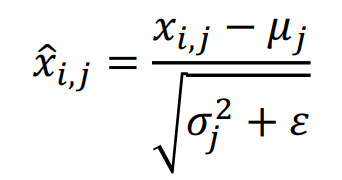

This formula is Standard Normalization (a.k.a. Standardization, Z-score normalization).

Mathematically, it looks like this:
  
  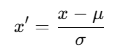

It is the same in code and mathematics.
image.png

As for the epsilon, it is just a tiny constant added so that we are never dividing by zero (because in math you can't divide by zero). If the standard deviation were to be zero, the value we get after normalization would be approximately zero.

When we subtract the mean of the values of the input from the values of the input, we get a new input.

The mean of the new input is zero. The mean being zero means that we have centered the input.

Note that when this is done, the values are no longer raw values but instead represent how far away the raw values at each point were from the average value.

After this, we divide by the standard deviation in order to scale our values and prevent them from being too large or too small. This ensures that their impacts are still present even though their values have been reduced.

**Why is it needed?**

Neural networks learn better if inputs are centered around 0 rather than in their raw form.

This ensures symmetry in activation functions.

In activation functions, when values are too large or too small they are sometimes squashed, and this prevents the model from understanding the actual impact or roles of those values.

Example: In ReLU, all negative values are set to zero, but if we had normalized the values, the negative value could have been around 0.001 or 0.0000001 and we could preserve its impact. Even if they were set to zero, all the other values were also scaled, meaning the values depict their real impact, so the values that get set to zero probably weren't playing an important role.

**Keyword: *Activations***

These are the outputs produced when you feed data through the layers in your architecture.

**In architecture normalization layer**

During feedforward, values can accumulate and either become too large or too small as they pass through layers in the architecture. When this happens, before we pass the values to an activation function or layers that squash values, a lot of data can end up being lost.

The normalization layers within the architecture prevent this by shifting and scaling activations, keeping them in a stable range. This stabilizes training, preserves information, and avoids data loss through vanishing/exploding activations.

Vanishing – when the values become very small

Exploding – when the values become very large

However, this doesn't happen all the time, and normalization can actually harm the model’s performance in such cases.

To prevent this, special parameters are placed in the normalization layer for the model to adjust as it sees fit.

image.png

γ (gamma) to scale and β (beta) to shift the activations.
This provides the model with enough flexibility to get the best results.


**How do I do it in practice?**

Normalization is done in a variety of ways

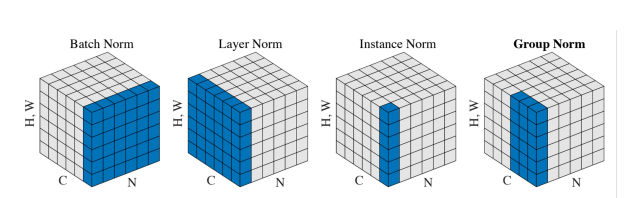

* Batch Norm

    For batch normalization, we perform normalization per channel for all the data within the batch.

    So if we have 20 images in a batch and each has 2 channels (1, 2), we will find the mean and standard deviation at channel 1 of all the 20 images, then use it to normalize all the values in channel 1 of all the 20 images. Then we do the same for channel 2.

    Our output will have the same number of batches and dimensions; the only difference is the values will be normalized.

* Layer Norm

    We perform normalization for each image and all its channels within the batch.

* Instance Norm

    We perform normalization for each channel in each image within the batch.

* Group Norm

    We perform normalization for a group of channels in each image within the batch.

**When do I use it in practice**

* General Rule of Thumb

    Normalization is usually applied after the linear/convolution operation and before the nonlinearity (ReLU, GELU, etc.)

* How many normalization layers should you have?

  Rule of thumb:
  
  Put one normalization layer after every major linear/conv transformation.

  If you have 3 conv layers, usually you’ll have 3 BatchNorm layers.

  If you have 5 MLP (linear) layers, usually 5 LayerNorm/BatchNorm1d layers.

  Why: Each layer’s outputs can drift to unstable ranges. Normalization keeps every stage stable.

  Cases you may skip them:

  First conv layer: Sometimes omitted, because input data is already normalized during preprocessing (e.g., subtracting dataset mean).

  Very shallow networks: With only 1–2 conv layers, normalization might not be critical.

  Final conv / FC layer before logits: Usually no normalization, since you want raw scores for classification.

  When you might use fewer:

  If your dataset is very small → BatchNorm can be unstable (since batch statistics are noisy).
  
  In this case:

  Use LayerNorm or GroupNorm instead.

  Or normalize only some layers.

  If you have residual/skip connections sometimes normalization is placed only at the entry/exit of the residual block, not every layer.

**How do I do it in code?**

***Pytorch Implementation***

For PyTorch, you don't have to provide the mean and standard deviation values,
they will all be calculated for you. You just have to call the function that performs the type of normalization you want to do and pass in your data and whatever other hyperparameters it allows you to tweak.

This is done in your model class.

Example:

    import torch
    import torch.nn as nn
    import torch.nn.functional as F

    class CNNWithNorm(nn.Module):
        def __init__(self, num_classes=10):
            super().__init__()
            
            # First conv block
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
            self.bn1   = nn.BatchNorm2d(32)   # batch normalization for conv output
            
            # Second conv block
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.bn2   = nn.BatchNorm2d(64)
            
            # Third conv block
            self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
            self.bn3   = nn.BatchNorm2d(128)
            
            # Fully connected layers
            self.fc1 = nn.Linear(128 * 4 * 4, 256)  # assuming input images are 32x32
            self.bn_fc1 = nn.BatchNorm1d(256)       # normalization in the FC layer
            self.fc2 = nn.Linear(256, num_classes)

            self.pool = nn.MaxPool2d(2, 2)  # downsampling
        
        def forward(self, x):
            # Convolutional blocks with BN + ReLU
            x = self.pool(F.relu(self.bn1(self.conv1(x))))  # [batch, 32, 16, 16]
            x = self.pool(F.relu(self.bn2(self.conv2(x))))  # [batch, 64, 8, 8]
            x = self.pool(F.relu(self.bn3(self.conv3(x))))  # [batch, 128, 4, 4]
            
            # Flatten for fully connected layers
            x = x.view(x.size(0), -1)  # [batch, 128*4*4]
            
            # Fully connected block
            x = F.relu(self.bn_fc1(self.fc1(x)))
            x = self.fc2(x)  # logits (no activation, softmax applied later)
            
            return x

Other functions found in PyTorch with their documentation descriptions:

For 1D inputs (specifically sequences such as text, audio, time series, and flattened images)

    A. BatchNorm1d
    
    class torch.nn.BatchNorm1d(num_features, eps=1e-05, momentum=0.1,
    affine=True, track_running_stats=True, device=None, dtype=None)

    Parameters
     
     num_features (int) – number of features or channels C of the input

     eps (float) – a value added to the denominator for numerical stability.
     Default: 1e-5

     momentum (Optional[float]) – the value used for the running_mean and
     running_var computation. Can be set to None for cumulative moving
     average (i.e. simple average). Default: 0.1

     affine (bool) – a boolean value that when set to True, this module has
     learnable affine parameters. Default: True

     track_running_stats (bool) – a boolean value that when set to True, this
     module tracks the running mean and variance, and when set to False, this
     module does not track such statistics, and initializes statistics
     buffers running_mean and running_var as None. When these buffers are
     None, this module always uses batch statistics. in both training and
     eval modes. Default: True

    B. InstanceNorm1d
    
    class torch.nn.InstanceNorm1d(num_features, eps=1e-05, momentum=0.1,
    affine=False, track_running_stats=False, device=None, dtype=None)

    Parameters
      
      num_features (int) – number of features or channels C of the input

      eps (float) – a value added to the denominator for numerical stability.
      Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and
      running_var computation. Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has
      learnable affine parameters, initialized the same way as done for batch
      normalization. Default: False.

      track_running_stats (bool) – a boolean value that when set to True,
      this module tracks the running mean and variance, and when set to
      False, this module does not track such statistics and always uses batch
      statistics in both training and eval modes. Default: False

    C. LazyBatchNorm1d
    class torch.nn.LazyBatchNorm1d(eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, device=None, dtype=None)

    Parameters
      
      eps (float) – a value added to the denominator for numerical stability.
      Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and
      running_var computation. Can be set to None for cumulative moving
      average (i.e. simple average). Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has
      learnable affine parameters. Default: True

      track_running_stats (bool) – a boolean value that when set to True,
      this module tracks the running mean and variance, and when set to
      False, this module does not track such statistics, and initializes
      statistics buffers running_mean and running_var as None. When these
      buffers are None, this module always uses batch statistics. in both
      training and eval modes. Default: True

    D. LazyInstanceNorm1d
    
    class torch.nn.LazyInstanceNorm1d(eps=1e-05, momentum=0.1, affine=True,
    track_running_stats=True, device=None, dtype=None)

    Parameters
      
      num_features – C from an expected input of size (N,C,L) or (C,L)

      eps (float) – a value added to the denominator for numerical stability.
      Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and
      running_var computation. Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has
      learnable affine parameters, initialized the same way as done for batch
      normalization. Default: False.

      track_running_stats (bool) – a boolean value that when set to True,
      this module tracks the running mean and variance, and when set to
      False, this module does not track such statistics and always uses batch
      statistics in both training and eval modes. Default: False

For 2D inputs (Specifically)
    
    A. BatchNorm2d

    class torch.nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1,
    affine=True, track_running_stats=True, device=None, dtype=None)

    Parameters
      num_features (int) – C from an expected input of size (N,C,H,W)

      eps (float) – a value added to the denominator for numerical stability. Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and running_var computation. Can be set to None for cumulative moving average (i.e. simple average). Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has learnable affine parameters. Default: True

      track_running_stats (bool) – a boolean value that when set to True, this module tracks the running mean and variance, and when set to False, this module does not track such statistics, and initializes statistics buffers running_mean and running_var as None. When these buffers are None, this module always uses batch statistics. in both training and eval modes. Default: True

    
    B.InstanceNorm2d

    class torch.nn.InstanceNorm2d(num_features, eps=1e-05, momentum=0.1,
    affine=False, track_running_stats=False, device=None, dtype=None)

    Parameters
      
      num_features (int) – C from an expected input of size (N,C,H,W) or (C,H,W)

      eps (float) – a value added to the denominator for numerical stability. Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and running_var computation. Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has learnable affine parameters, initialized the same way as done for batch normalization. Default: False.

      track_running_stats (bool) – a boolean value that when set to True, this module tracks the running mean and variance, and when set to False, this module does not track such statistics and always uses batch statistics in both training and eval modes. Default: False

    C. LazyBatchNorm2d
    
    class torch.nn.LazyBatchNorm2d(eps=1e-05, momentum=0.1, affine=True,
    track_running_stats=True, device=None, dtype=None)

    Parameters

      eps (float) – a value added to the denominator for numerical stability. Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and running_var computation. Can be set to None for cumulative moving average (i.e. simple average). Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has learnable affine parameters. Default: True

      track_running_stats (bool) – a boolean value that when set to True, this module tracks the running mean and variance, and when set to False, this module does not track such statistics, and initializes statistics buffers running_mean and running_var as None. When these buffers are None, this module always uses batch statistics. in both training and eval modes. Default: True

    D. LazyInstanceNorm2d
    
    class torch.nn.LazyInstanceNorm2d(eps=1e-05, momentum=0.1, affine=True,
    track_running_stats=True, device=None, dtype=None)

    Parameters
      num_features – C from an expected input of size (N,C,H,W) or (C,H,W)

      eps (float) – a value added to the denominator for numerical stability. Default: 1e-5

      momentum (Optional[float]) – the value used for the running_mean and running_var computation. Default: 0.1

      affine (bool) – a boolean value that when set to True, this module has learnable affine parameters, initialized the same way as done for batch normalization. Default: False.

      track_running_stats (bool) – a boolean value that when set to True, this module tracks the running mean and variance, and when set to False, this module does not track such statistics and always uses batch statistics in both training and eval modes. Default: False



#####**Note that these also have a 3D version for 3D inputs**
#####**There are also some normalization layers that work regardless of the input dimension, e.g., LayerNorm, RMSNorm, SyncBatchNorm, and GroupNorm**



**Alternatives to Normalization**

* Skip connections / residual connections – help stabilize training without normalization.

* Self-normalizing networks (SeLU activation + AlphaDropout) – activations automatically stay normalized during training.

* Weight standardization – normalize weights during training updates, not activations.

* FixUp initialization – special weight initialization to train deep nets without normalization.

**Activation Function/Layer**

Using the child class strategy and activation functions available in the nn package.

We initialize and set our chosen activation function in the constructor, then layer and pass the data through it in the forward method.

This is what activation functions in the nn package are like:

    ReLU

    class torch.nn.ReLU(inplace=False)

Check the complete implementation above to see how it is done.

**Pooling Layer**

Using the child class strategy and pooling functions available in the nn package.

We initialize and set our chosen pooling function in the constructor, then layer and pass the data through it in the forward method.

This is what pooling functions in the nn package are like:

    MaxPool2d

    class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

Check the complete implementation above to see how things are done

**Dropout Layer**

Using the child class strategy and dropout layer available in the nn package.

We initialize and set our dropout layer in the constructor, then layer and pass the data through it in the forward method.

This is what the dropout layer in the nn package is like:

    Dropout2d

    class torch.nn.Dropout2d(p=0.5, inplace=False)

Check the complete implementation above to see how things are done

**Fully Connected Layer**

Using the child class strategy and fully connected layer available in the nn package.

We initialize and set our fully connected layer in the constructor, then layer and pass the data through it in the forward method.

This is what the fully connected layer in the nn package is like:

    Dropout2d

    class torch.nn.Dropout2d(p=0.5, inplace=False)

Check the complete implementation above to see how things are done